# Logistic regression

#### Exp: Student exam dataset 

In [1]:
import pandas as pd
data = pd.read_csv('pass.csv')
print(data.shape)
data.head(5)

(29, 2)


,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [2]:
#
X= data.loc[:,['Hours']]
#X = data.Hours
y = data.Pass

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test  = train_test_split(X,y)

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
hrs = 3
print(model.predict_proba([[hrs]]))
print(model.predict([[hrs]]))

[[0.36070887 0.63929113]]
[1]


In [6]:
import numpy as np
 # Creating random numbers between -10 to 14 , taking 100 records
hours_gen = np.linspace(-10,14,100) 
print(hours_gen.shape)
hours_gen

(100,)


array([-10.        ,  -9.75757576,  -9.51515152,  -9.27272727,
        -9.03030303,  -8.78787879,  -8.54545455,  -8.3030303 ,
        -8.06060606,  -7.81818182,  -7.57575758,  -7.33333333,
        -7.09090909,  -6.84848485,  -6.60606061,  -6.36363636,
        -6.12121212,  -5.87878788,  -5.63636364,  -5.39393939,
        -5.15151515,  -4.90909091,  -4.66666667,  -4.42424242,
        -4.18181818,  -3.93939394,  -3.6969697 ,  -3.45454545,
        -3.21212121,  -2.96969697,  -2.72727273,  -2.48484848,
        -2.24242424,  -2.        ,  -1.75757576,  -1.51515152,
        -1.27272727,  -1.03030303,  -0.78787879,  -0.54545455,
        -0.3030303 ,  -0.06060606,   0.18181818,   0.42424242,
         0.66666667,   0.90909091,   1.15151515,   1.39393939,
         1.63636364,   1.87878788,   2.12121212,   2.36363636,
         2.60606061,   2.84848485,   3.09090909,   3.33333333,
         3.57575758,   3.81818182,   4.06060606,   4.3030303 ,
         4.54545455,   4.78787879,   5.03030303,   5.27

In [7]:
model.predict(hours_gen.reshape(-1,1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [8]:
prob = model.predict_proba(hours_gen.reshape(-1,1))

In [9]:
prob_df = pd.DataFrame(prob)
prob_df.head()

,0,1
0,0.999939,0.000061
1,0.999926,0.000074
2,0.999911,0.000089
3,0.999892,0.000108
4,0.999869,0.000131


In [10]:
prob_df.loc[:,1].shape

(100,)

In [11]:
np.array(X).ravel()

array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
       3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 , 2.1 , 1.4 ,
       4.1 , 3.8 , 2.5 , 1.3 , 1.  , 0.86, 2.8 ])

In [12]:
y.shape

(29,)

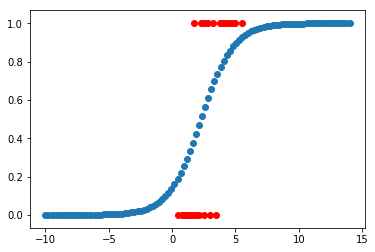

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(hours_gen, prob_df.loc[:,1])
plt.scatter(np.array(X).ravel(),y,color='red')

## Example-2 cars dataset

In [14]:
data = pd.read_csv('mtcars.csv')
print(data.shape)
data.head()

(32, 12)


,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [15]:
X = data.loc[:,['mpg','hp','wt','vs']]
y = data.am
model = LogisticRegression()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=10)

In [16]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
y_predict = model.predict(X_test)

In [18]:
y_test

20    0
7     0
5     0
2     1
3     0
21    0
13    0
28    1
12    0
1     1
Name: am, dtype: int64

In [19]:
y_predict

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [20]:
#from sklearn.metrics import Confusion_matrix
#Confusion_matrix(y_test, y_predict)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9

In [21]:
pd.crosstab(y_test,y_predict)

# 6 manual card -> showing wrongly 1 car manual but its automatic 
# 3 automatic cars

col_0,0,1
am,,
0,6,1
1,0,3


In [22]:
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [23]:
# Predict(y) whether the vehical is Automatic or not based on the passing values of (X) 

#X = data.loc[:,['mpg','hp','wt','vs']]
#y = data.am

model.predict([[20,120,2.7,0]])

array([1], dtype=int64)